In [21]:
import numpy as np
from scipy.stats import norm
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 240
mpl.rcParams["figure.figsize"] = (10,6)
from part2 import Barrier_option
import pandas as pd

# `Barrier_option` class
`European_price` is the funtion to calculate the price of the vanilla option of the barrier option.  
`delta_func` is a function has nothing to do with the class object, we use it to calculate the thereotical price of the barrier option.  
`price` is the thereotical price of the barrier option object.  
`delta,gamma,vega` is the numerical derivative of `price`, we regard it as the thereotical value.  
All function start with `MC` is the implementation of Monte Carlo of the barrier option to calculate numerical price/Greeks.  
All function start with `EMC` is the implementation of Brownian bridge Monte Carlo of the barrier option to calculate numerical price/Greeks.  
All function start with `CEMC` is the implementation of conditional expectation of Brownian bridge Monte Carlo of the barrier option to   calculate numerical price/Greeks

In [35]:
pricer = Barrier_option(55, 60, 0.02, 0.2, 1, 70, "call", "up-and-out")
p = pricer.price
print(f"The thereotical price of the {pricer.type} {pricer.opt_type} option is: {round(p,6)}")

The thereotical price of the up-and-out call option is: 0.41482


In [59]:
M = 500
n = range(500,10500,500)
mc = []
emc = []
cemc = []
for N in tqdm(n):
    mc.append(np.mean([pricer.MC_price(N,M) for _ in range(15)]))
    emc.append(np.mean([pricer.EMC_price(N,M) for _ in range(15)]))
    cemc.append(np.mean([pricer.CEMC_price(N,M) for _ in range(15)]))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:50<00:00,  5.54s/it]


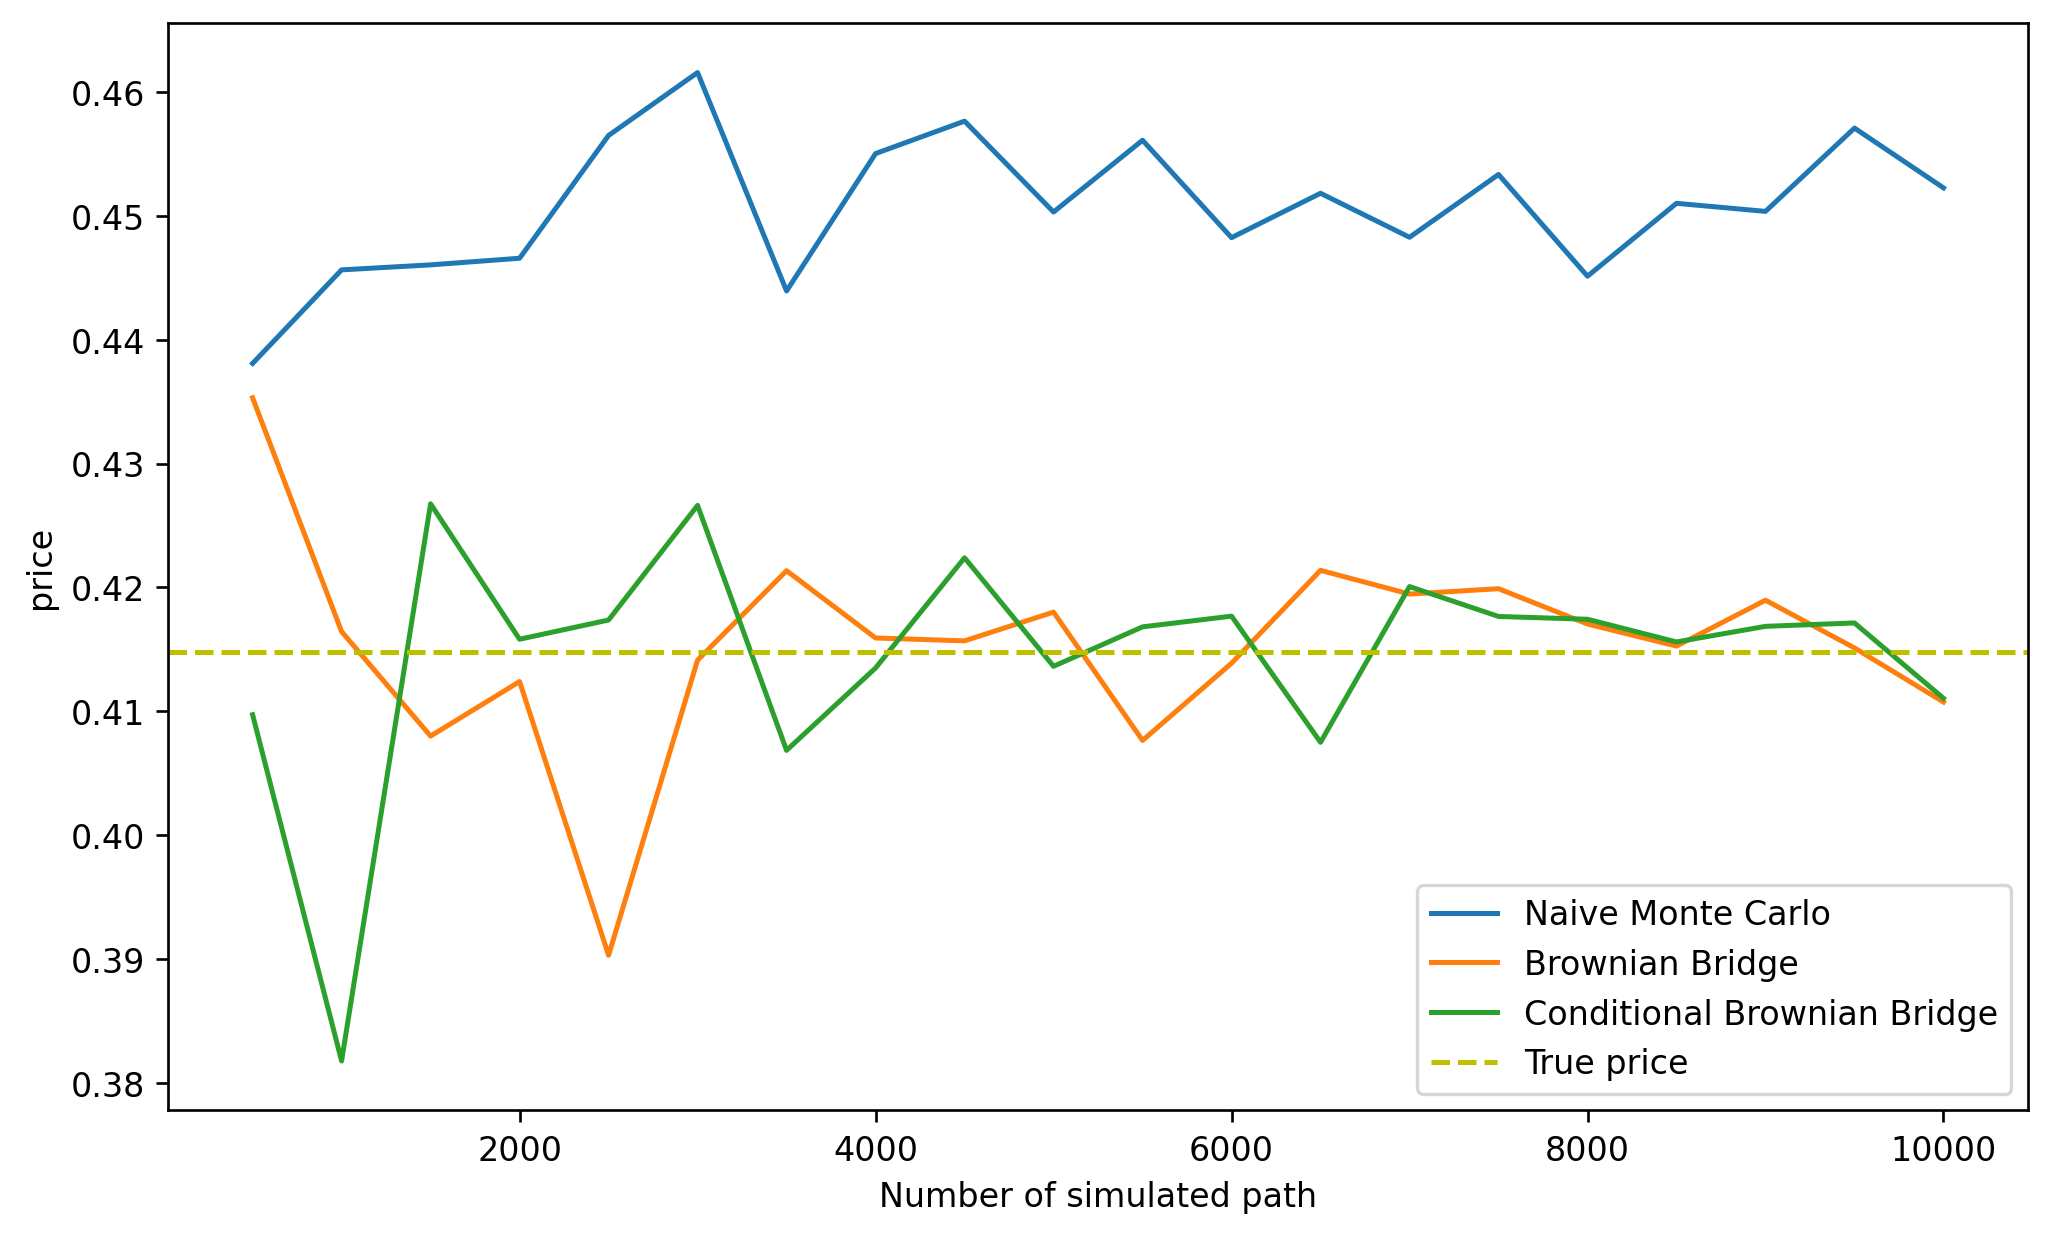

In [60]:
plt.plot(n,mc,label = "Naive Monte Carlo")
plt.plot(n,emc,label = "Brownian Bridge")
plt.plot(n,cemc,label = "Conditional Brownian Bridge")
plt.axhline(p,color = "y",linestyle = '--',label = "True price")
plt.xlabel("Number of simulated path")
plt.ylabel("price")
plt.legend()
# plt.savefig("./price1.jpg")

In [54]:
pricer = Barrier_option(55, 60, 0.02, 0.2, 1, 70, "put", "up-and-in")
p = pricer.price
print(f"The thereotical price of the {pricer.type} {pricer.opt_type} option is: {round(p,6)}")

The thereotical price of the up-and-in put option is: 0.099485


In [29]:
M = 500
n = range(500,10500,500)
mc = []
emc = []
cemc = []
for N in tqdm(n):
    mc.append(np.mean([pricer.MC_price(N,M) for _ in range(15)]))
    emc.append(np.mean([pricer.EMC_price(N,M) for _ in range(15)]))

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [01:06<00:00,  3.32s/it]


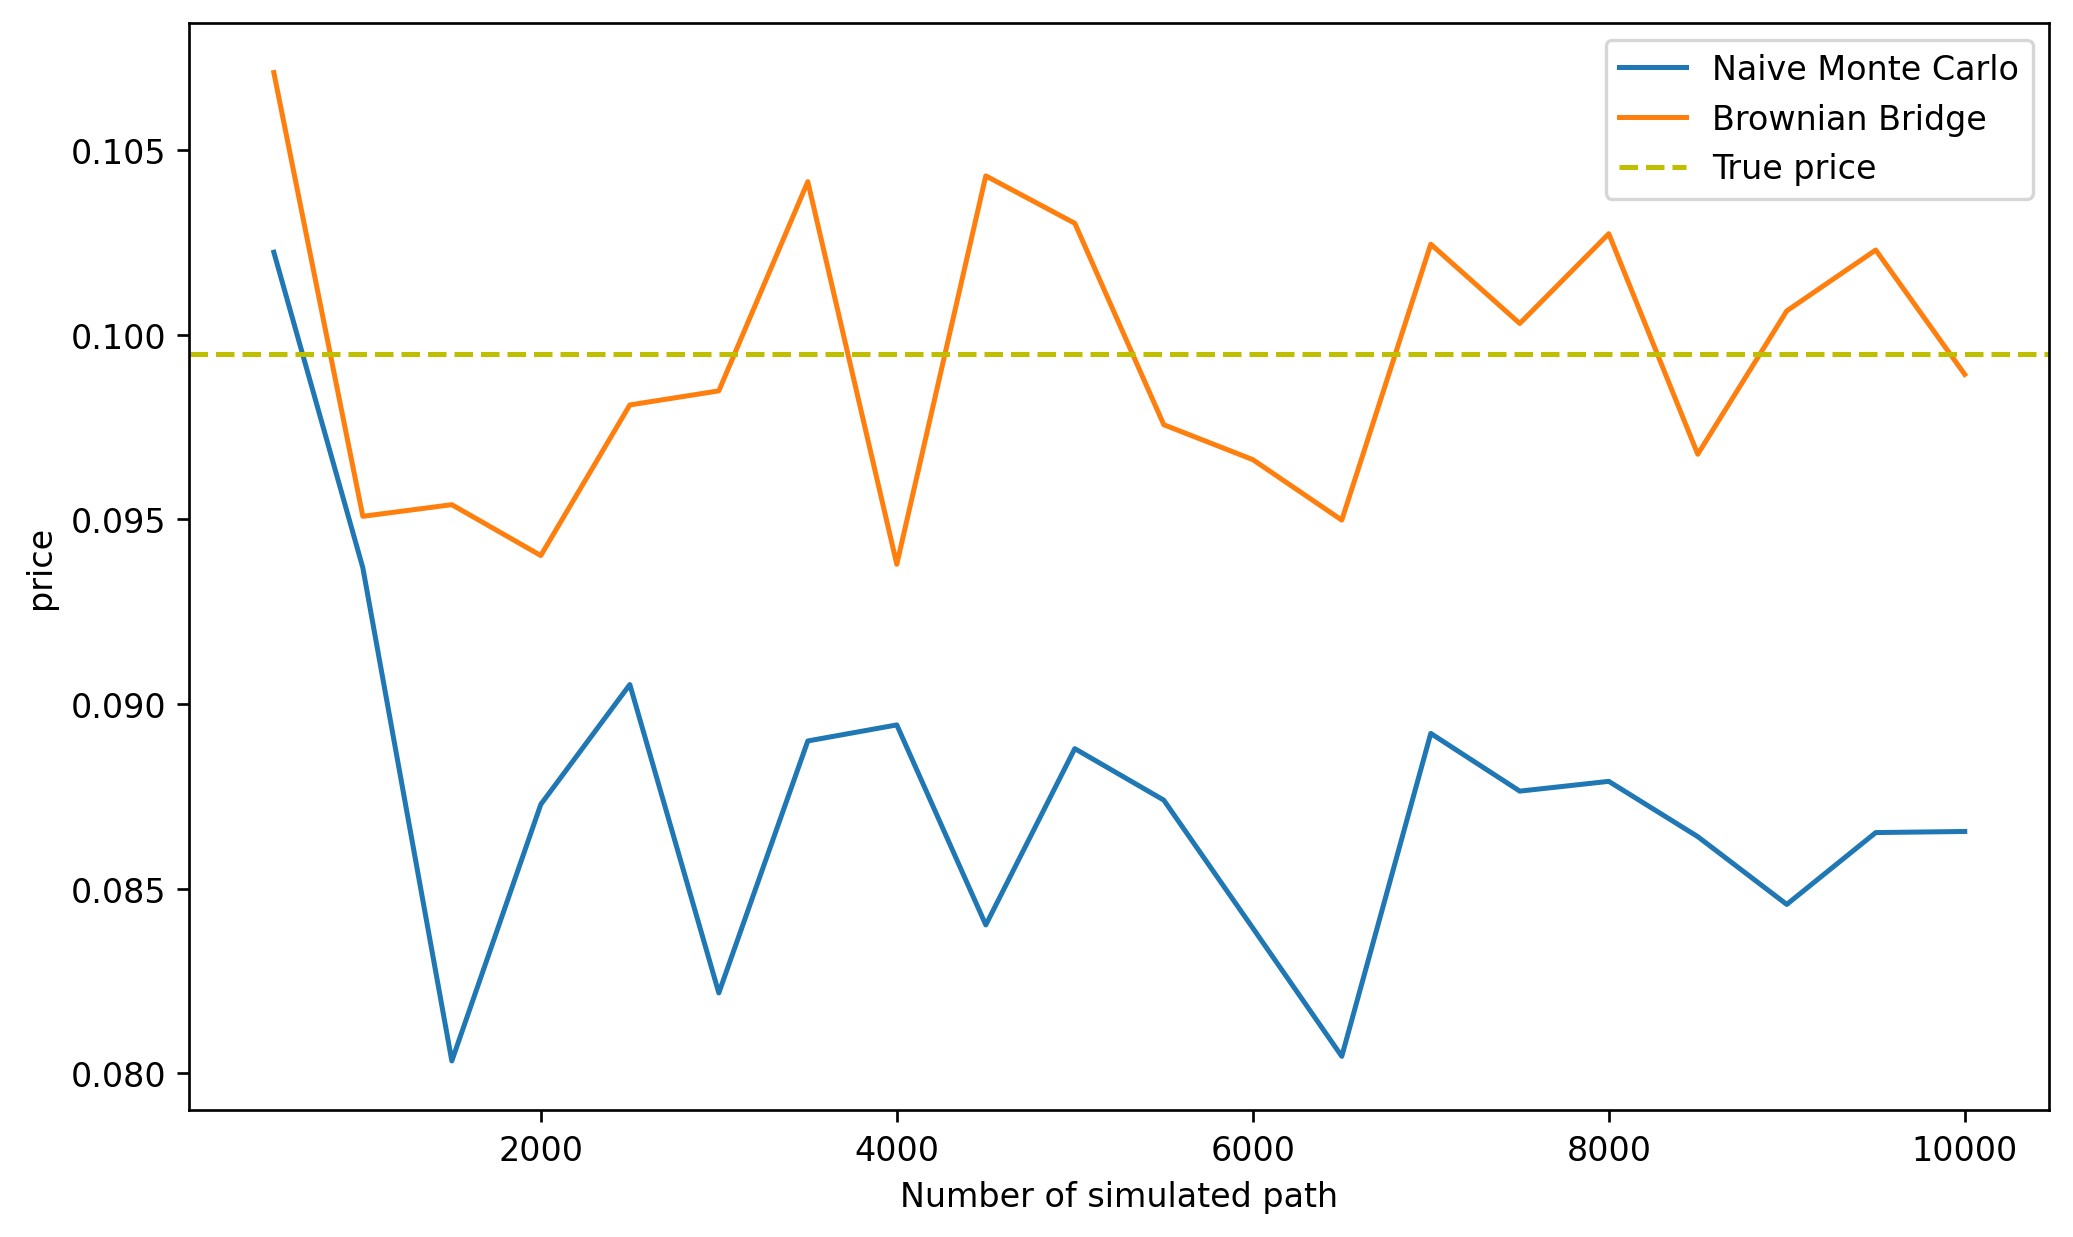

In [30]:
plt.plot(n,mc,label = "Naive Monte Carlo")
plt.plot(n,emc,label = "Brownian Bridge")
plt.axhline(p,color = "y",linestyle = '--',label = "True price")
plt.xlabel("Number of simulated path")
plt.ylabel("price")
plt.legend()
plt.savefig("./price2.jpg")

In [32]:
pricer = Barrier_option(55, 60, 0.02, 0.2, 1, 70, "call", "up-and-out")
p = pricer.price
M = 500
N = 10000
mc = []
emc = []
cemc = []
for _ in tqdm(range(300)):
    mc.append(pricer.MC_price(N,M))
    emc.append(pricer.EMC_price(N,M))
    cemc.append(pricer.CEMC_price(N,M))
var_mc = np.var(mc)
var_emc = np.var(emc)
var_cemc = np.var(cemc)
mean_mc = np.mean(mc)
mean_emc = np.mean(emc)
mean_cemc = np.mean(cemc)
error_mc = abs(mean_mc-p)/p
error_emc = abs(mean_emc-p)/p
error_cemc = abs(mean_cemc-p)/p

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [03:33<00:00,  1.40it/s]


In [35]:
dic = {"Naive MC": [mean_mc,var_mc,error_mc],
      "Brownian Bridge": [mean_emc,var_emc,error_emc],
      "Conditonal Brownian Bridge": [mean_cemc,var_cemc,error_cemc]}

In [43]:
df = pd.DataFrame(dic,index = ["mean","variance","relative error"])

In [50]:
print(df.to_latex(index = True))

\begin{tabular}{lrrr}
\toprule
{} &  Naive MC &  Brownian Bridge &  Conditonal Brownian Bridge \\
\midrule
mean           &  0.452474 &         0.417000 &                    0.415776 \\
variance       &  0.000217 &         0.000192 &                    0.000186 \\
relative error &  0.090771 &         0.005257 &                    0.002305 \\
\bottomrule
\end{tabular}



C:\Users\Cloud Liu\AppData\Local\Temp\ipykernel_26728\3712304701.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index = True))


In [60]:
pricer = Barrier_option(55, 60, 0.02, 0.2, 1, 70, "put", "up-and-in")
p = pricer.price
M = 500
N = 10000
mc = []
emc = []
for _ in tqdm(range(300)):
    mc.append(pricer.MC_price(N,M))
    emc.append(pricer.EMC_price(N,M))
var_mc = np.var(mc)
var_emc = np.var(emc)
mean_mc = np.mean(mc)
mean_emc = np.mean(emc)
error_mc = abs(mean_mc-p)/p
error_emc = abs(mean_emc-p)/p
dic = {"Naive MC": [mean_mc,var_mc,error_mc],
      "Brownian Bridge": [mean_emc,var_emc,error_emc]}

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:06<00:00,  2.37it/s]


In [61]:
df = pd.DataFrame(dic,index = ["mean","variance","relative error"])
print(df.to_latex(index = True))

\begin{tabular}{lrr}
\toprule
{} &  Naive MC &  Brownian Bridge \\
\midrule
mean           &  0.085346 &         0.098692 \\
variance       &  0.000055 &         0.000078 \\
relative error &  0.142124 &         0.007970 \\
\bottomrule
\end{tabular}



C:\Users\Cloud Liu\AppData\Local\Temp\ipykernel_26728\1843568874.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index = True))


In [16]:
var1 = []
var2 = []
N = 10000
for M in tqdm(m:=range(100,600,100)):
    var1.append(np.var([pricer.EMC_delta(N,M) for _ in range(100)]))
    var2.append(np.var([pricer.CEMC_delta(N,M) for _ in range(100)]))

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:51<00:00, 34.33s/it]


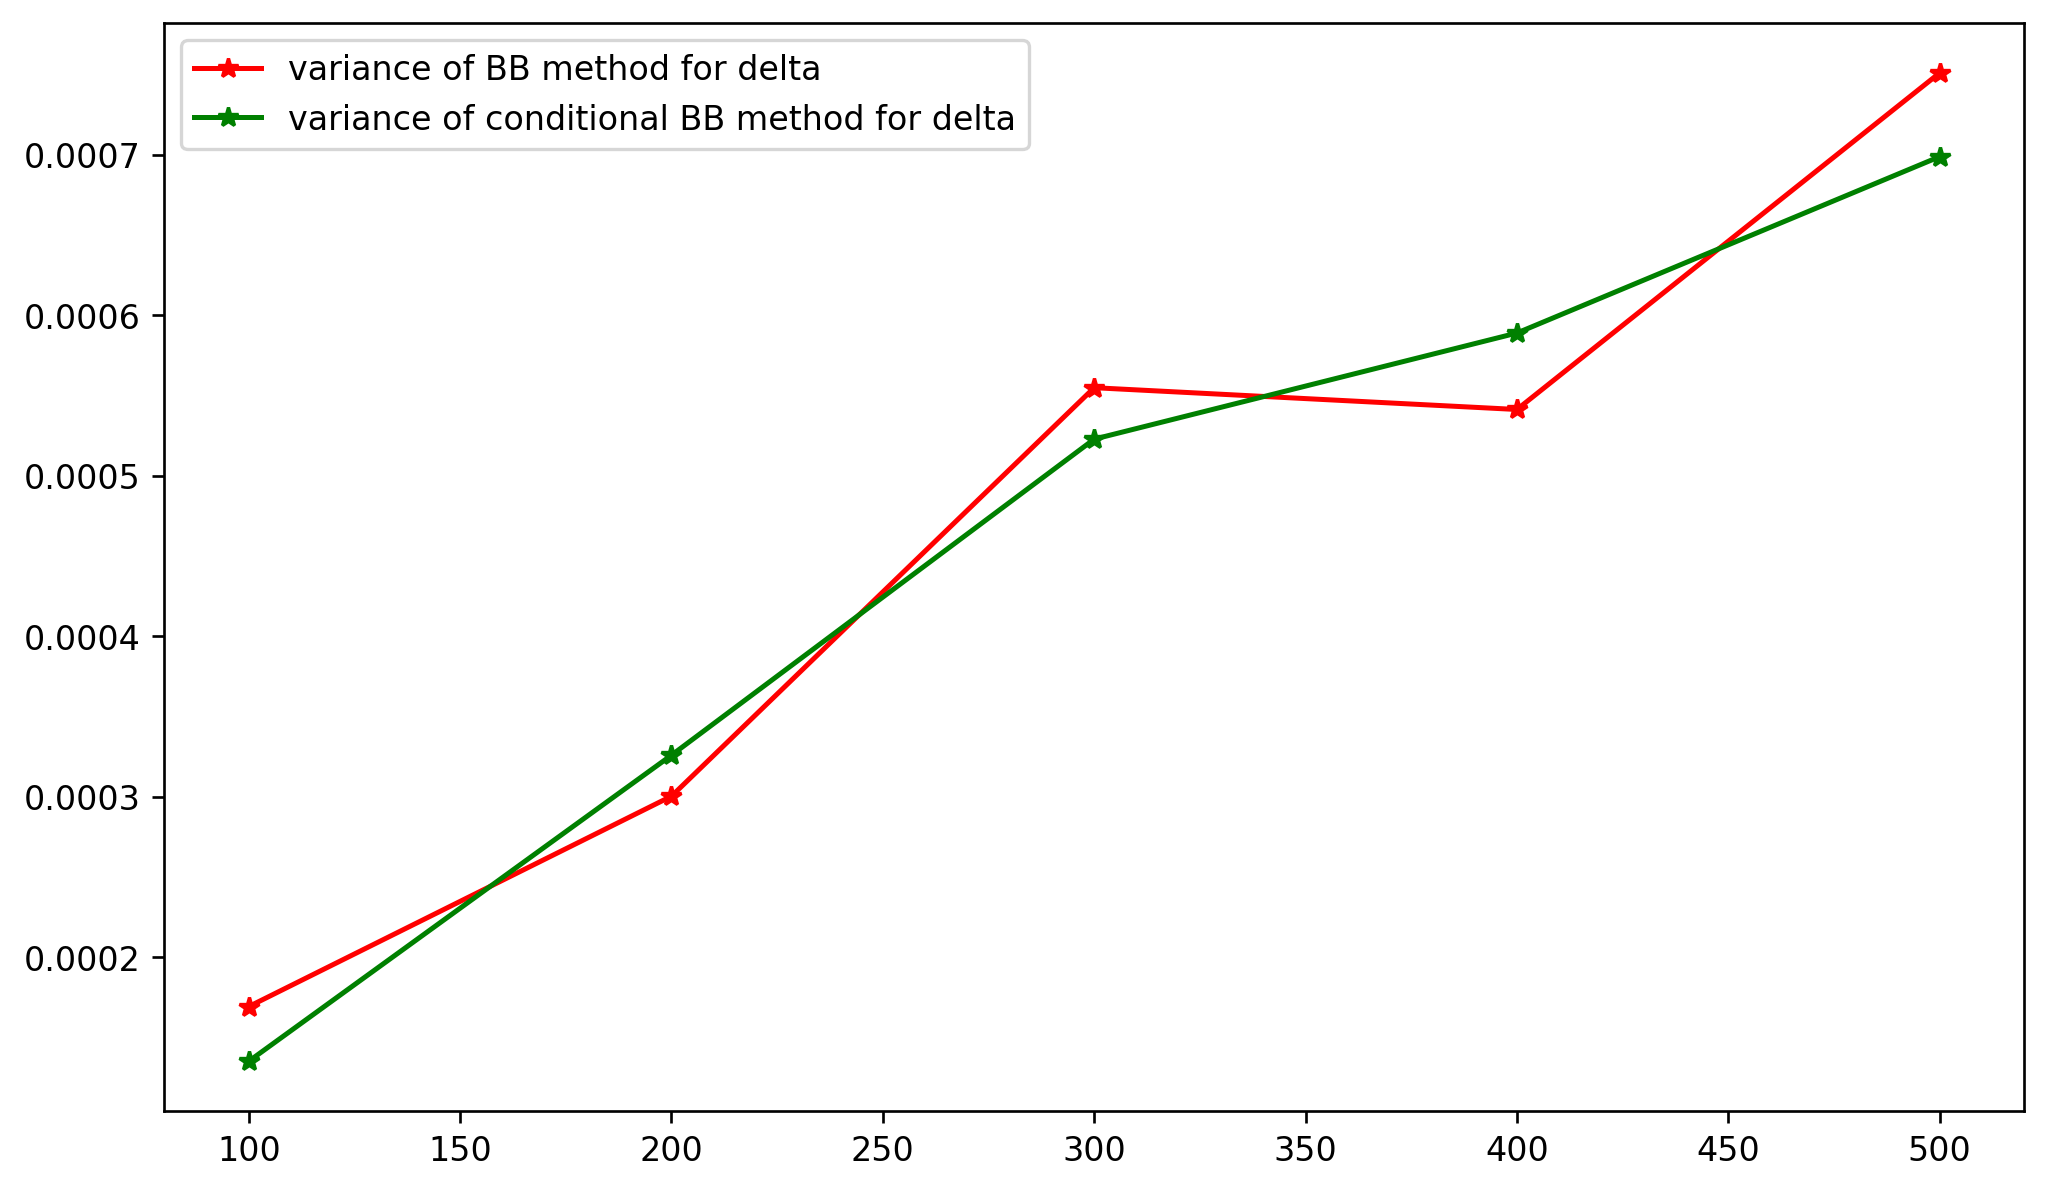

In [17]:
plt.plot(m,var1,"r*-",label = "variance of BB method for delta")
plt.plot(m,var2,"g*-",label = "variance of conditional BB method for delta")
plt.legend()
plt.savefig("./varincrease.jpg")

In [42]:
pricer = Barrier_option(55, 60, 0.02, 0.2, 1, 70, "call", "up-and-out")
delta = pricer.delta
gamma = pricer.gamma
vega = pricer.vega
M = 100
N = 50000
mc_delta,mc_gamma,mc_vega = [],[],[]
emc_delta,emc_gamma,emc_vega = [],[],[]
cemc_delta,cemc_gamma,cemc_vega = [],[],[]
for _ in tqdm(range(500)):
    mc_delta.append(pricer.MC_delta(N,M))
    mc_gamma.append(pricer.MC_gamma(N,M))
    mc_vega.append(pricer.MC_vega(N,M))
    
    emc_delta.append(pricer.EMC_delta(N,M))
    emc_gamma.append(pricer.EMC_gamma(N,M))
    emc_vega.append(pricer.EMC_vega(N,M))
    
    cemc_delta.append(pricer.CEMC_delta(N,M))
    cemc_gamma.append(pricer.CEMC_gamma(N,M))
    cemc_vega.append(pricer.CEMC_vega(N,M))
    

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [13:53<00:00,  1.67s/it]


In [43]:
mean_mc_delta = np.mean(mc_delta)
mean_emc_delta = np.mean(emc_delta)
mean_cemc_delta = np.mean(cemc_delta)

mean_mc_gamma = np.mean(mc_gamma)
mean_emc_gamma = np.mean(emc_gamma)
mean_cemc_gamma = np.mean(cemc_gamma)

mean_mc_vega = np.mean(mc_vega)
mean_emc_vega = np.mean(emc_vega)
mean_cemc_vega = np.mean(cemc_vega)

In [44]:
var_mc_delta = np.var(mc_delta)
var_emc_delta = np.var(emc_delta)
var_cemc_delta = np.var(cemc_delta)

var_mc_gamma = np.var(mc_gamma)
var_emc_gamma = np.var(emc_gamma)
var_cemc_gamma = np.var(cemc_gamma)

var_mc_vega = np.var(mc_vega)
var_emc_vega = np.var(emc_vega)
var_cemc_vega = np.var(cemc_vega)

In [45]:
error_mc_delta = abs(mean_mc_delta-delta)/delta
error_emc_delta = abs(mean_emc_delta-delta)/delta
error_cemc_delta = abs(mean_cemc_delta-delta)/delta

error_mc_gamma = abs(abs(mean_mc_gamma-gamma)/gamma)
error_emc_gamma = abs(abs(mean_emc_gamma-gamma)/gamma)
error_cemc_gamma = abs(abs(mean_cemc_gamma-gamma)/gamma)

error_mc_vega = abs(abs(mean_mc_vega-vega)/vega)
error_emc_vega = abs(abs(mean_emc_vega-vega)/vega)
error_cemc_vega = abs(abs(mean_cemc_vega-vega)/vega)

In [46]:
data = {
    ("Naive Monte Carlo","mean"):{f"Delta({round(delta,6)})":mean_mc_delta,f"Gamma({round(gamma,6)})":mean_mc_gamma,f"Vega({round(vega*0.01,6)})":mean_mc_vega*0.01},
    ("Naive Monte Carlo","variance"):{f"Delta({round(delta,6)})":var_mc_delta,f"Gamma({round(gamma,6)})":var_mc_gamma,f"Vega({round(vega*0.01,6)})":var_mc_vega*0.01},
    ("Naive Monte Carlo","relative error"):{f"Delta({round(delta,6)})":error_mc_delta,f"Gamma({round(gamma,6)})":error_mc_gamma,f"Vega({round(vega*0.01,6)})":error_mc_vega*0.01},
    ("Brownian Bridge","mean"):{f"Delta({round(delta,6)})":mean_emc_delta,f"Gamma({round(gamma,6)})":mean_emc_gamma,f"Vega({round(vega*0.01,6)})":mean_emc_vega*0.01},
    ("Brownian Bridge","variance"):{f"Delta({round(delta,6)})":var_emc_delta,f"Gamma({round(gamma,6)})":var_emc_gamma,f"Vega({round(vega*0.01,6)})":var_emc_vega*0.01},
    ("Brownian Bridge","relative error"):{f"Delta({round(delta,6)})":error_emc_delta,f"Gamma({round(gamma,6)})":error_emc_gamma,f"Vega({round(vega*0.01,6)})":error_emc_vega*0.01},
    ("Conditional Brownian Bridge","mean"):{f"Delta({round(delta,6)})":mean_cemc_delta,f"Gamma({round(gamma,6)})":mean_cemc_gamma,f"Vega({round(vega*0.01,6)})":mean_cemc_vega*0.01},
    ("Conditional Brownian Bridge","variance"):{f"Delta({round(delta,6)})":var_cemc_delta,f"Gamma({round(gamma,6)})":var_cemc_gamma,f"Vega({round(vega*0.01,6)})":var_cemc_vega*0.01},
    ("Conditional Brownian Bridge","relative error"):{f"Delta({round(delta,6)})":error_cemc_delta,f"Gamma({round(gamma,6)})":error_cemc_gamma,f"Vega({round(vega*0.01,6)})":error_cemc_vega*0.01},    
}
df = pd.DataFrame.from_dict(data, orient='index')
multi_index = pd.MultiIndex.from_tuples(df.index)
df.index = multi_index

In [53]:
df

Delta(0.011671)  Gamma(-0.005482)  \
Naive Monte Carlo           mean                   0.018174         -0.006654   
                            variance               0.000043          0.000060   
                            relative error         0.557225          0.213819   
Brownian Bridge             mean                   0.012530         -0.005315   
                            variance               0.000033          0.000057   
                            relative error         0.073637          0.030404   
Conditional Brownian Bridge mean                   0.012242         -0.005215   
                            variance               0.000035          0.000049   
                            relative error         0.048963          0.048580   

                                            Vega(-0.03531)  
Naive Monte Carlo           mean                 -0.034952  
                            variance              0.002349  
                            relative error        0.000101  
Brownian Bridge             mean                 -0.029682  
                            variance              0.001805  
                            relative error        0.001594  
Conditional Brownian Bridge mean                 -0.029522  
                            variance              0.002035  
                            relative error        0.001639

In [50]:
print(df.to_latex(index = True))

\begin{tabular}{llrrr}
\toprule
                            &                &  Delta(0.011671) &  Gamma(-0.005482) &  Vega(-0.03531) \\
\midrule
Naive Monte Carlo & mean &         0.018174 &         -0.006654 &       -0.034952 \\
                            & variance &         0.000043 &          0.000060 &        0.002349 \\
                            & relative error &         0.557225 &          0.213819 &        0.000101 \\
Brownian Bridge & mean &         0.012530 &         -0.005315 &       -0.029682 \\
                            & variance &         0.000033 &          0.000057 &        0.001805 \\
                            & relative error &         0.073637 &          0.030404 &        0.001594 \\
Conditional Brownian Bridge & mean &         0.012242 &         -0.005215 &       -0.029522 \\
                            & variance &         0.000035 &          0.000049 &        0.002035 \\
                            & relative error &         0.048963 &          0.048580 

C:\Users\Cloud Liu\AppData\Local\Temp\ipykernel_9768\3712304701.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index = True))
